In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/K-NEarest-Neighbor/master/Classified%20Data")

In [3]:
df.head(5)

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/K-NEarest-Neighbor/master/Classified%20Data",index_col=0)

In [6]:
df.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


In [9]:
# standard scaler

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
dfn=df.drop('TARGET CLASS',axis=1)

In [12]:
dfn.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702


In [13]:
scaler.fit(dfn)

StandardScaler()

In [14]:
dfn.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702


In [17]:
# transforming
scaled_features=scaler.transform(dfn)
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [22]:
# converting in dataframe with same column name
df2=pd.DataFrame(scaled_features,columns=dfn.columns[:])
df2.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759


# train test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(df2,df['TARGET CLASS'],test_size=0.30)

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn=KNeighborsClassifier(n_neighbors=1) #with k==1

In [31]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
pred=knn.predict(x_test)
pred

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], d

# model performance

In [46]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [43]:
print(confusion_matrix(y_test,pred))

[[121  18]
 [  8 153]]


In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       139
           1       0.89      0.95      0.92       161

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [48]:
print(accuracy_score(y_test,pred)*100)

91.33333333333333


# lets check some good k values

In [49]:
error=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i!=y_test))


In [54]:
error

[0.08666666666666667,
 0.09,
 0.08666666666666667,
 0.06333333333333334,
 0.07666666666666666,
 0.06666666666666667,
 0.07666666666666666,
 0.07,
 0.07,
 0.06666666666666667,
 0.07,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.07,
 0.056666666666666664,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07333333333333333,
 0.07,
 0.07333333333333333,
 0.06333333333333334,
 0.07,
 0.06333333333333334,
 0.07,
 0.06333333333333334,
 0.07333333333333333,
 0.07,
 0.07,
 0.06333333333333334,
 0.07333333333333333,
 0.06666666666666667,
 0.07,
 0.06666666666666667,
 0.06666666666666667,
 0.06333333333333334,
 0.06666666666666667,
 0.06666666666666667,
 0.06333333333333334,
 0.06,
 0.06333333333333334,
 0.06,
 0.06666666666666667,
 0.06,
 0.07,
 0.06333333333333334,
 0.06666666666666667]

# Let's just see that on graphs 

Text(0, 0.5, 'error')

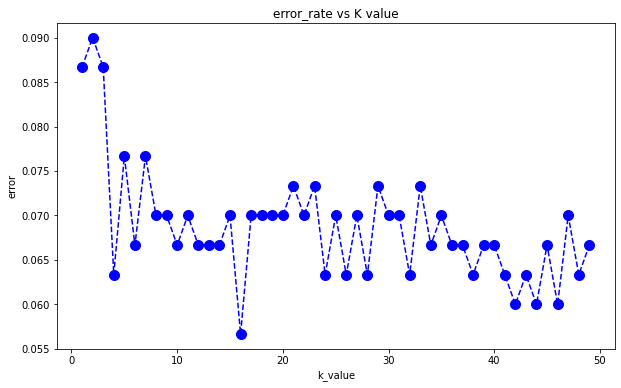

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error,color='blue',linestyle="dashed",marker='o',markersize=10)
plt.title("error_rate vs K value")
plt.xlabel("k_value")
plt.ylabel("error")

In [60]:
# Let's now check for some specific value k = 16
knn=KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)


In [61]:
print(confusion_matrix(y_test,pred))

[[129  10]
 [  7 154]]


In [62]:
print(accuracy_score(y_test,pred)*100)

94.33333333333334


In [69]:
# lets check for 41,44
knn=KNeighborsClassifier(n_neighbors=41)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [70]:
print(confusion_matrix(y_test,pred))

[[127  12]
 [  7 154]]


In [71]:
print(accuracy_score(y_test,pred)*100)

93.66666666666667


In [66]:
knn=KNeighborsClassifier(n_neighbors=44)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [67]:
print(confusion_matrix(y_test,pred))

[[128  11]
 [  7 154]]


In [68]:
print(accuracy_score(y_test,pred)*100)

94.0


# Observations

So now it is seen that model performance is good for k = 16

Although k=44 also very close but we have the least error value w.r.t our data set